# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.

Este é um problema de concessão de cartões de crédito, utilizando uma base de dados de uma instituição financeira afim de determinar os fatores que influenciam a renda de cada individuo.

Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar quais fatores possuem maior importancia na hora de definir a renda,através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

Objetivos do negócio: Identificar dentre as variáveis explicativas um padrão para a renda.
Objetivos da modelagem: O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a determinar os pontos mais relevantes que influenciam a renda, para criar um modelo de previsão de renda.

Também é nessa etapa que se constrói um planejamento do projeto.


## Etapa 2 Crisp-DM: Entendimento dos dados

A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela. A variavel 'Unnamed: 0' não estará na tabela pois será dropada.

### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data que o cliente fez o cadastro                  | object|
| id_cliente              |  ID do cliente                                      | int64|
| sexo                    |  'F'= Feminino; 'M'= Masculino                      | object|
| posse_de_veiculo        |  True = 'Possui; False = 'Não Possui'               | bool|
| posse_de_imovel         |  True = 'Possui; False = 'Não Possui'               | bool|
| qtd_filhos              |  Quantidade de Filhos                               | int64|
| tipo_renda              |  Tipo de renda (ex: Assalariado, empresário...)     | object|
| educacao                |  Nível de escolaridade                              | object|
| estado_civil            |  Estado Civil (ex: Casado, Solteiro...)             | object|
| tipo_residencia         |  tipo de residência (ex: casa/apartamento...)       | object|
| idade                   |  Idade em anos                                      | int64|
| tempo_emprego           |  Tempo de emprego em anos                           | float64|
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float64|
| **renda**               |  Variavel resposta (renda da pessoa)                | float64|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import os

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
#renda1 = pd.read_csv('./input/previsao_de_renda.csv')

renda1 = pd.read_csv('/kaggle/input/prev-renda-2/previsao_de_renda.csv')

In [3]:
renda1.head()

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602740                    1.0  8060.34  
1            Casa     28       7.183562                    2.0  1852.15  
2            Casa     35       0.838356                    2.0  2253.89  
3            Casa     30       4.846575                    3.0  6600.77  
4   Governamental     33       4.293151                    1.0  6475.97

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda1, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#prof.to_file('./output/renda_analisys.html')

Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas.

sexo
F    10119
M     4881
Name: count, dtype: int64


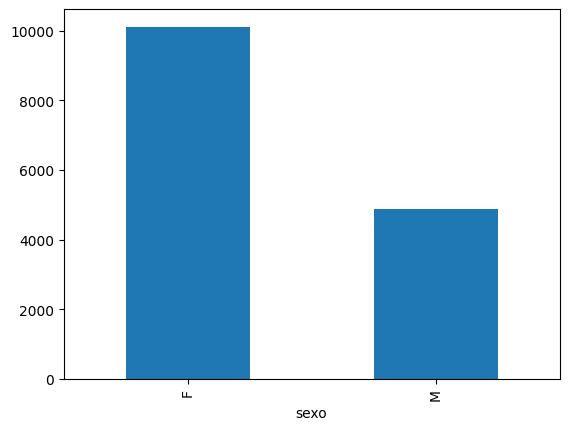

In [6]:
#Analisando o grafico de barras referente a variavel 'sexo'

grafico_barras = renda1['sexo'].value_counts().plot.bar()

print(renda1['sexo'].value_counts())

Na base vemos que a maioria das pessoas são do sexo feminino (10119) contra 4881 pessoas do sexo masculino.

posse_de_veiculo
False    9140
True     5860
Name: count, dtype: int64


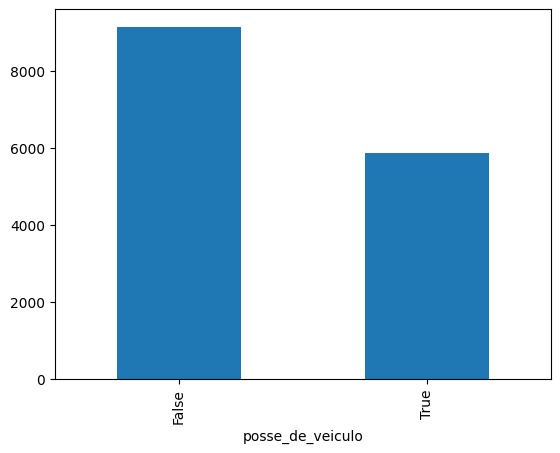

In [7]:
#Analisando o grafico de barras referente a variavel 'posse_de_veiculo'

grafico_barras = renda1['posse_de_veiculo'].value_counts().plot.bar()

print(renda1['posse_de_veiculo'].value_counts())

9140 das pessoas não possuem veiculos e 5860 possuem veiculos.

<Axes: ylabel='idade'>

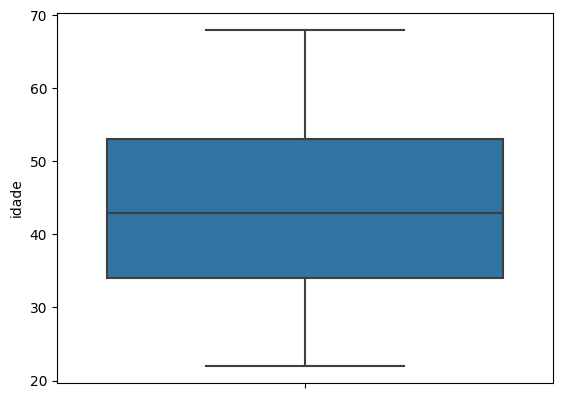

In [8]:
#Boxplot referente a idade dos clientes
sns.boxplot(y = 'idade', data = renda1)

Com o grafico é possivel percever que na base existem pessoas de varrias idades mas a sua grande maioria concentrada entre 40 e 50 anos.

### Entendimento dos dados - Bivariadas




Entender a alteração da renda indicada pela variável resposta (renda) e as variáveis explicativas (demais variaveis). Para isto, vamos utilizar a variável renda em relaçao as demais variáveis explicativas.


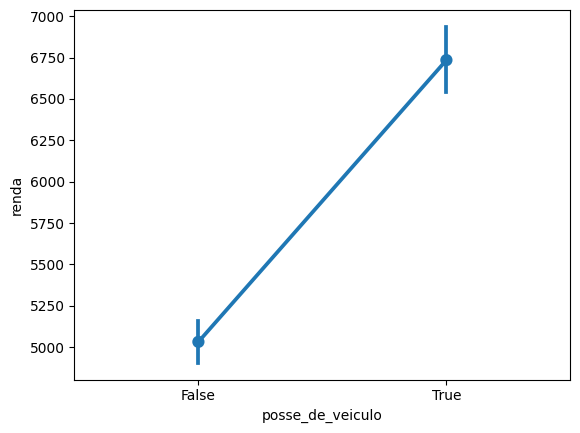

In [9]:
#Grafico pointplot entre posse de veiculo e a renda
possui_veicuo_renda = sns.pointplot(x='posse_de_veiculo', y='renda',
                     data=renda1, dodge=True, errorbar =('ci', 90))

As pessoas que possuem veiculos tendem a ter uma renda superior à pessoas que não possuem veiculos.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

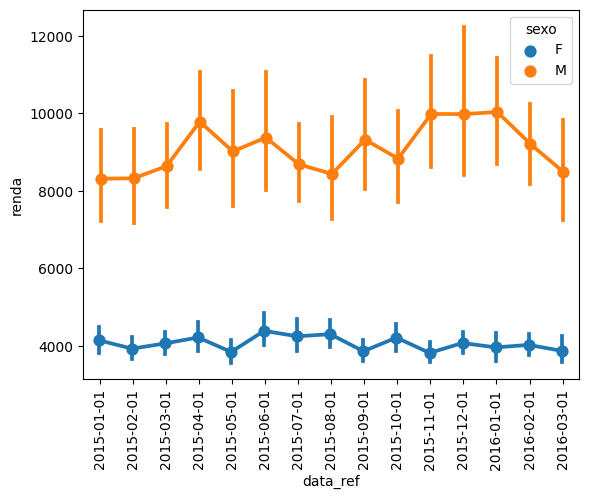

In [10]:
#verificando os perfis medios no tempo para a variavel sexo em relaçao a renda

ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=renda1, dodge=True, errorbar=('ci',95))
plt.xticks(rotation=90)

Apesar do público feminino estar em maior parte na base, cruzando com a renda vemos que os homens detem um salario muito superios as mulheres.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Uma visão geral dos alertas que o Pandas_profile entrega temos:

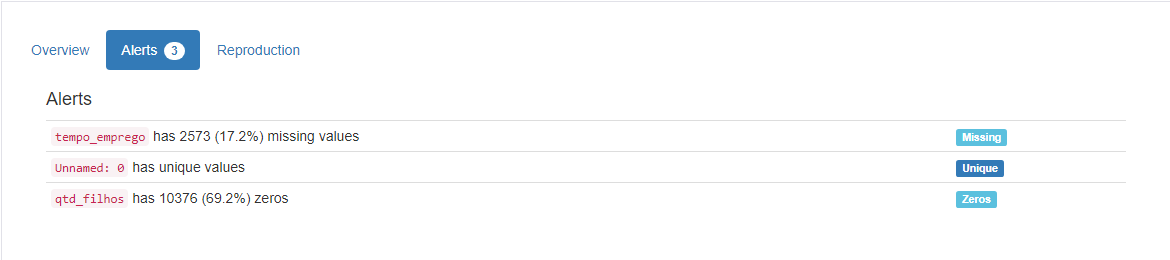

A variável tempo_emmprego possui 2573 missing values,logo será necessario fazer o drop desses valores. A variavel Unnamed: 0, possui um valor constante, a coluna será dropada. Ja a informação sobre a quantidade de filhos, mostra que na maioria dos analisados (69,2%) não possuem filhos.

In [11]:
#Criando o novo DataFrame tratado.

renda = (renda1.assign(data_ref = lambda x: pd.to_datetime(x.data_ref))
    .dropna()
    .drop(columns=['Unnamed: 0'])
    .replace({False: 0, True: 1})
)

/tmp/ipykernel_17/2991609905.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({False: 0, True: 1})


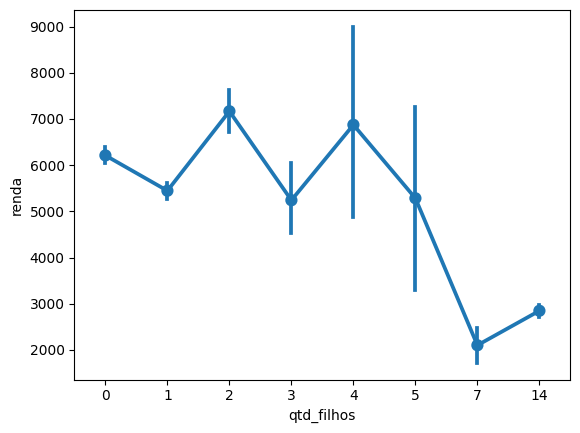

In [12]:
#analisando a variavel qtd_filhos para determinar a relevancia dela
#em relaçao a renda
qtd_filhos_renda = sns.pointplot(x='qtd_filhos', y='renda',
                     data=renda, dodge=True, errorbar =('ci', 90))

In [13]:
renda['qtd_filhos'].value_counts()

qtd_filhos
0     7887
1     2973
2     1358
3      183
4       17
7        5
14       2
5        2
Name: count, dtype: int64

In [14]:
renda_corr = renda.drop(columns=['data_ref','tipo_residencia','estado_civil', 'educacao', 'tipo_renda', 'sexo'])
renda_corr.corr()

id_cliente  posse_de_veiculo  posse_de_imovel  \
id_cliente               1.000000         -0.025763        -0.093315   
posse_de_veiculo        -0.025763          1.000000         0.011342   
posse_de_imovel         -0.093315          0.011342         1.000000   
qtd_filhos               0.024052          0.085103         0.007266   
idade                   -0.033226         -0.109198         0.094254   
tempo_emprego           -0.036373         -0.076155         0.009465   
qt_pessoas_residencia    0.036489          0.131266         0.003925   
renda                   -0.018270          0.083105         0.015367   

                       qtd_filhos     idade  tempo_emprego  \
id_cliente               0.024052 -0.033226      -0.036373   
posse_de_veiculo         0.085103 -0.109198      -0.076155   
posse_de_imovel          0.007266  0.094254       0.009465   
qtd_filhos               1.000000 -0.279069      -0.063220   
idade                   -0.279069  1.000000       0.321573   
tempo_emprego           -0.063220  0.321573       1.000000   
qt_pessoas_residencia    0.902509 -0.253526      -0.065670   
renda                    0.002192  0.127069       0.385013   

                       qt_pessoas_residencia     renda  
id_cliente                          0.036489 -0.018270  
posse_de_veiculo                    0.131266  0.083105  
posse_de_imovel                     0.003925  0.015367  
qtd_filhos                          0.902509  0.002192  
idade                              -0.253526  0.127069  
tempo_emprego                      -0.065670  0.385013  
qt_pessoas_residencia               1.000000  0.018683  
renda                               0.018683  1.000000

Devido a variavel qtd_filhos ter uma certa correlacao com a quantidade de pessoas na residencia, inicialmente vamos manter ela e caso seja necessario fazer a remoçao dela futuramente.

In [15]:
#criando dummies
renda_dummy = pd.get_dummies(renda, columns =['sexo','tipo_renda','educacao',
                                        'estado_civil','tipo_residencia'],drop_first = True,dtype = int) 

In [16]:
renda_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_ref                       12427 non-null  datetime64[ns]
 1   id_cliente                     12427 non-null  int64         
 2   posse_de_veiculo               12427 non-null  int64         
 3   posse_de_imovel                12427 non-null  int64         
 4   qtd_filhos                     12427 non-null  int64         
 5   idade                          12427 non-null  int64         
 6   tempo_emprego                  12427 non-null  float64       
 7   qt_pessoas_residencia          12427 non-null  float64       
 8   renda                          12427 non-null  float64       
 9   sexo_M                         12427 non-null  int64         
 10  tipo_renda_Bolsista            12427 non-null  int64         
 11  tipo_renda_Empresári

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Como técnica de modelagem, optei por usar a técnica stepwise selection. Para isso, inicialmente irei separar o dataset em y = Variavel alvo e X = demais variaveis.


In [17]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(dtype=float, index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Adicione  {:30} com p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print('Retire {:30} com p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [18]:
renda_dummy

data_ref  id_cliente  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0     2015-01-01       15056                 0                1           0   
1     2015-01-01        9968                 1                1           0   
2     2015-01-01        4312                 1                1           0   
3     2015-01-01       10639                 0                1           1   
4     2015-01-01        7064                 1                0           0   
...          ...         ...               ...              ...         ...   
14994 2016-03-01       11477                 1                0           0   
14995 2016-03-01       16006                 0                1           0   
14997 2016-03-01        6194                 1                1           0   
14998 2016-03-01        4922                 1                0           0   
14999 2016-03-01       14651                 0                1           2   

       idade  tempo_emprego  qt_pessoas_residencia    renda  sexo_M  ...  \
0         26       6.602740                    1.0  8060.34       0  ...   
1         28       7.183562                    2.0  1852.15       1  ...   
2         35       0.838356                    2.0  2253.89       0  ...   
3         30       4.846575                    3.0  6600.77       0  ...   
4         33       4.293151                    1.0  6475.97       1  ...   
...      ...            ...                    ...      ...     ...  ...   
14994     32       9.849315                    2.0  1592.57       1  ...   
14995     48      13.887671                    1.0  7990.58       0  ...   
14997     45       7.832877                    2.0   604.82       0  ...   
14998     36       4.298630                    2.0  3352.27       1  ...   
14999     34       7.219178                    4.0  1160.99       0  ...   

       educacao_Superior incompleto  estado_civil_Separado  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   
...                             ...                    ...   
14994                             1                      0   
14995                             0                      0   
14997                             0                      0   
14998                             0                      0   
14999                             0                      0   

       estado_civil_Solteiro  estado_civil_União  estado_civil_Viúvo  \
0                          1                   0                   0   
1                          0                   0                   0   
2                          0                   0                   0   
3                          0                   0                   0   
4                          1                   0                   0   
...                      ...                 ...                 ...   
14994                      0                   0                   0   
14995                      1                   0                   0   
14997                      0                   0                   0   
14998                      0                   0                   0   
14999                      0                   1                   0   

       tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                         1                            0   
1                         1                            0   
2                         1                            0   
3                         1                            0   
4                         0                            0   
...                     ...                          ...   
14994                     1                            0   
14995                     1                            0

In [19]:
#Separando o DataSet

X = renda_dummy.drop(columns=['renda','data_ref']).iloc[:]
y = renda_dummy.iloc[:,8]

In [20]:
#treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
#Variavel com as melhores variaveis explicativas seguindo o stepwise selection

resposta = stepwise_selection(X_test, y_test)

Adicione  tempo_emprego                  com p-value 8.47062e-122
Adicione  sexo_M                         com p-value 8.19909e-117
Adicione  educacao_Superior completo     com p-value 0.000226477
Adicione  idade                          com p-value 0.000382414
Adicione  posse_de_veiculo               com p-value 0.00320998


### Rodando o modelo


A técnica Stepwise_selection, adiciona e remove variaveis explicativas em uma nova variaveis que nomeei como resposta. Nela vão estar apenas as variaveis que essa tecnica considera relevante, baseado no P-Value.
Após a seleção das variáveis, é definido um novo X com apenas as variaveis explicativas armazenadas na variavel resposta. Assim é feito o treino novamente e calculado o R-Squared.


In [22]:
X = renda_dummy[resposta]
y = renda_dummy.iloc[:,8].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_pred = sm.OLS(y_train, X_train).fit().predict(X_test)
print(f'valor R-squared: {r2_score(y_test, y_pred)}')

valor R-squared: 0.29087254714418376


O valor de R-squared encontrado utilizando essa técnica foi de 0.291

In [23]:
# criando a variavel de classificaçao

clf = DecisionTreeClassifier(random_state = 100)

#treinando o modelo

clf = clf.fit(X_test,y_test)

[Text(0.15787264312925883, 0.9886363636363636, 'idade <= 66.5\ngini = 0.999\nsamples = 3107\nvalue = [2, 1, 1 ... 1, 1, 1]'),
 Text(0.15732968587865861, 0.9659090909090909, 'tempo_emprego <= 0.21\ngini = 0.999\nsamples = 3104\nvalue = [2, 1, 1 ... 1, 1, 1]'),
 Text(0.10609116927417576, 0.9431818181818182, 'idade <= 40.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.10554821202357555, 0.9204545454545454, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.10663412652477598, 0.9204545454545454, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.20856820248314145, 0.9431818181818182, 'tempo_emprego <= 37.397\ngini = 0.999\nsamples = 3099\nvalue = [2, 1, 1 ... 1, 1, 1]'),
 Text(0.10772004102597643, 0.9204545454545454, 'idade <= 24.5\ngini = 0.999\nsamples = 3091\nvalue = [2, 1, 1 ... 1, 1, 1]'),
 Text(0.011423311530206239, 0.8977272727272727, 'educacao_Superior completo <= 0.5\ngini = 0.941\nsamples = 23\nvalue = [0, 0, 0 ... 0, 0, 0]'),

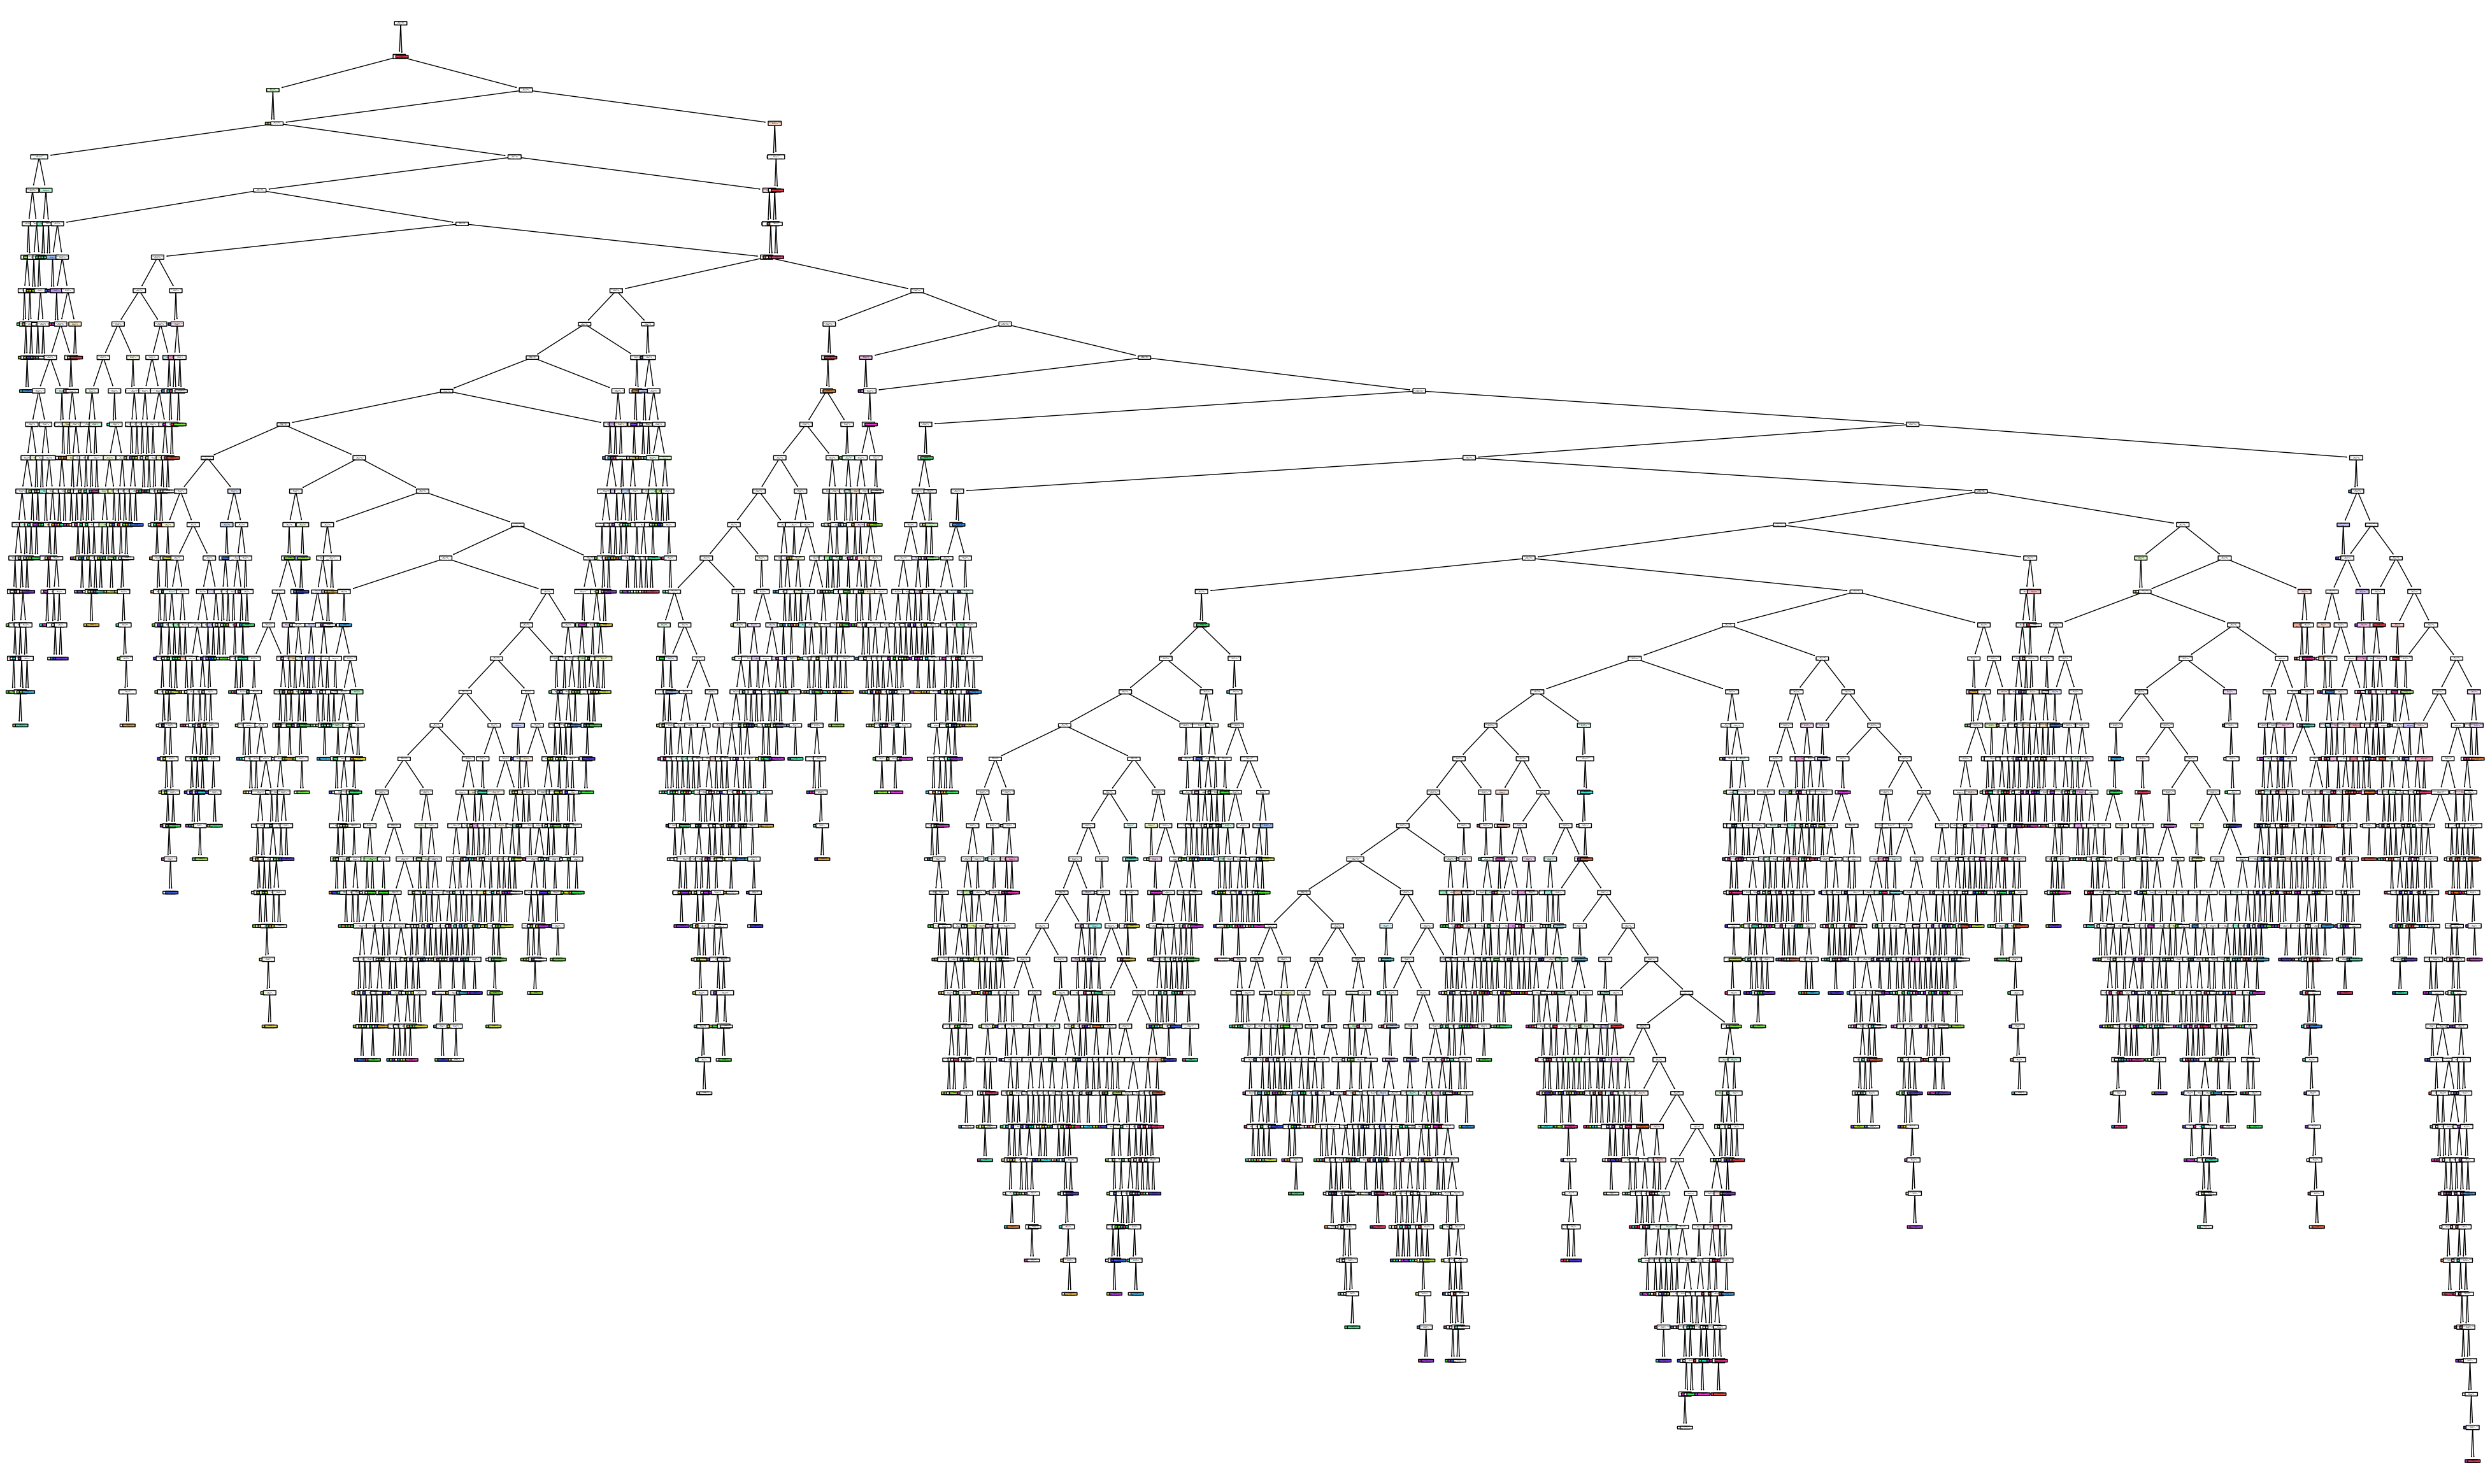

In [24]:
plt.figure(figsize=(50,30))
plot_tree(clf,
          filled=True,
          rounded=True,
          feature_names=X_train.columns)

A arvore de decisão ficou demasiadamente complexa, sendo assim utilizarei uma arvore de regressão com uma profundidades maximas entre 2 e 8 e a com o melhor MSE para gerar a arvore. 

In [25]:
#Usando a regressão com uma profundidade maxima de 2 e 8.

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [26]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))


template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 42450062,78
O MSE da árvore com profundidade=8 é: 41452262,07


A arvore com a profundidade = 8 é mais adequada por aprensentar um MSE menor.

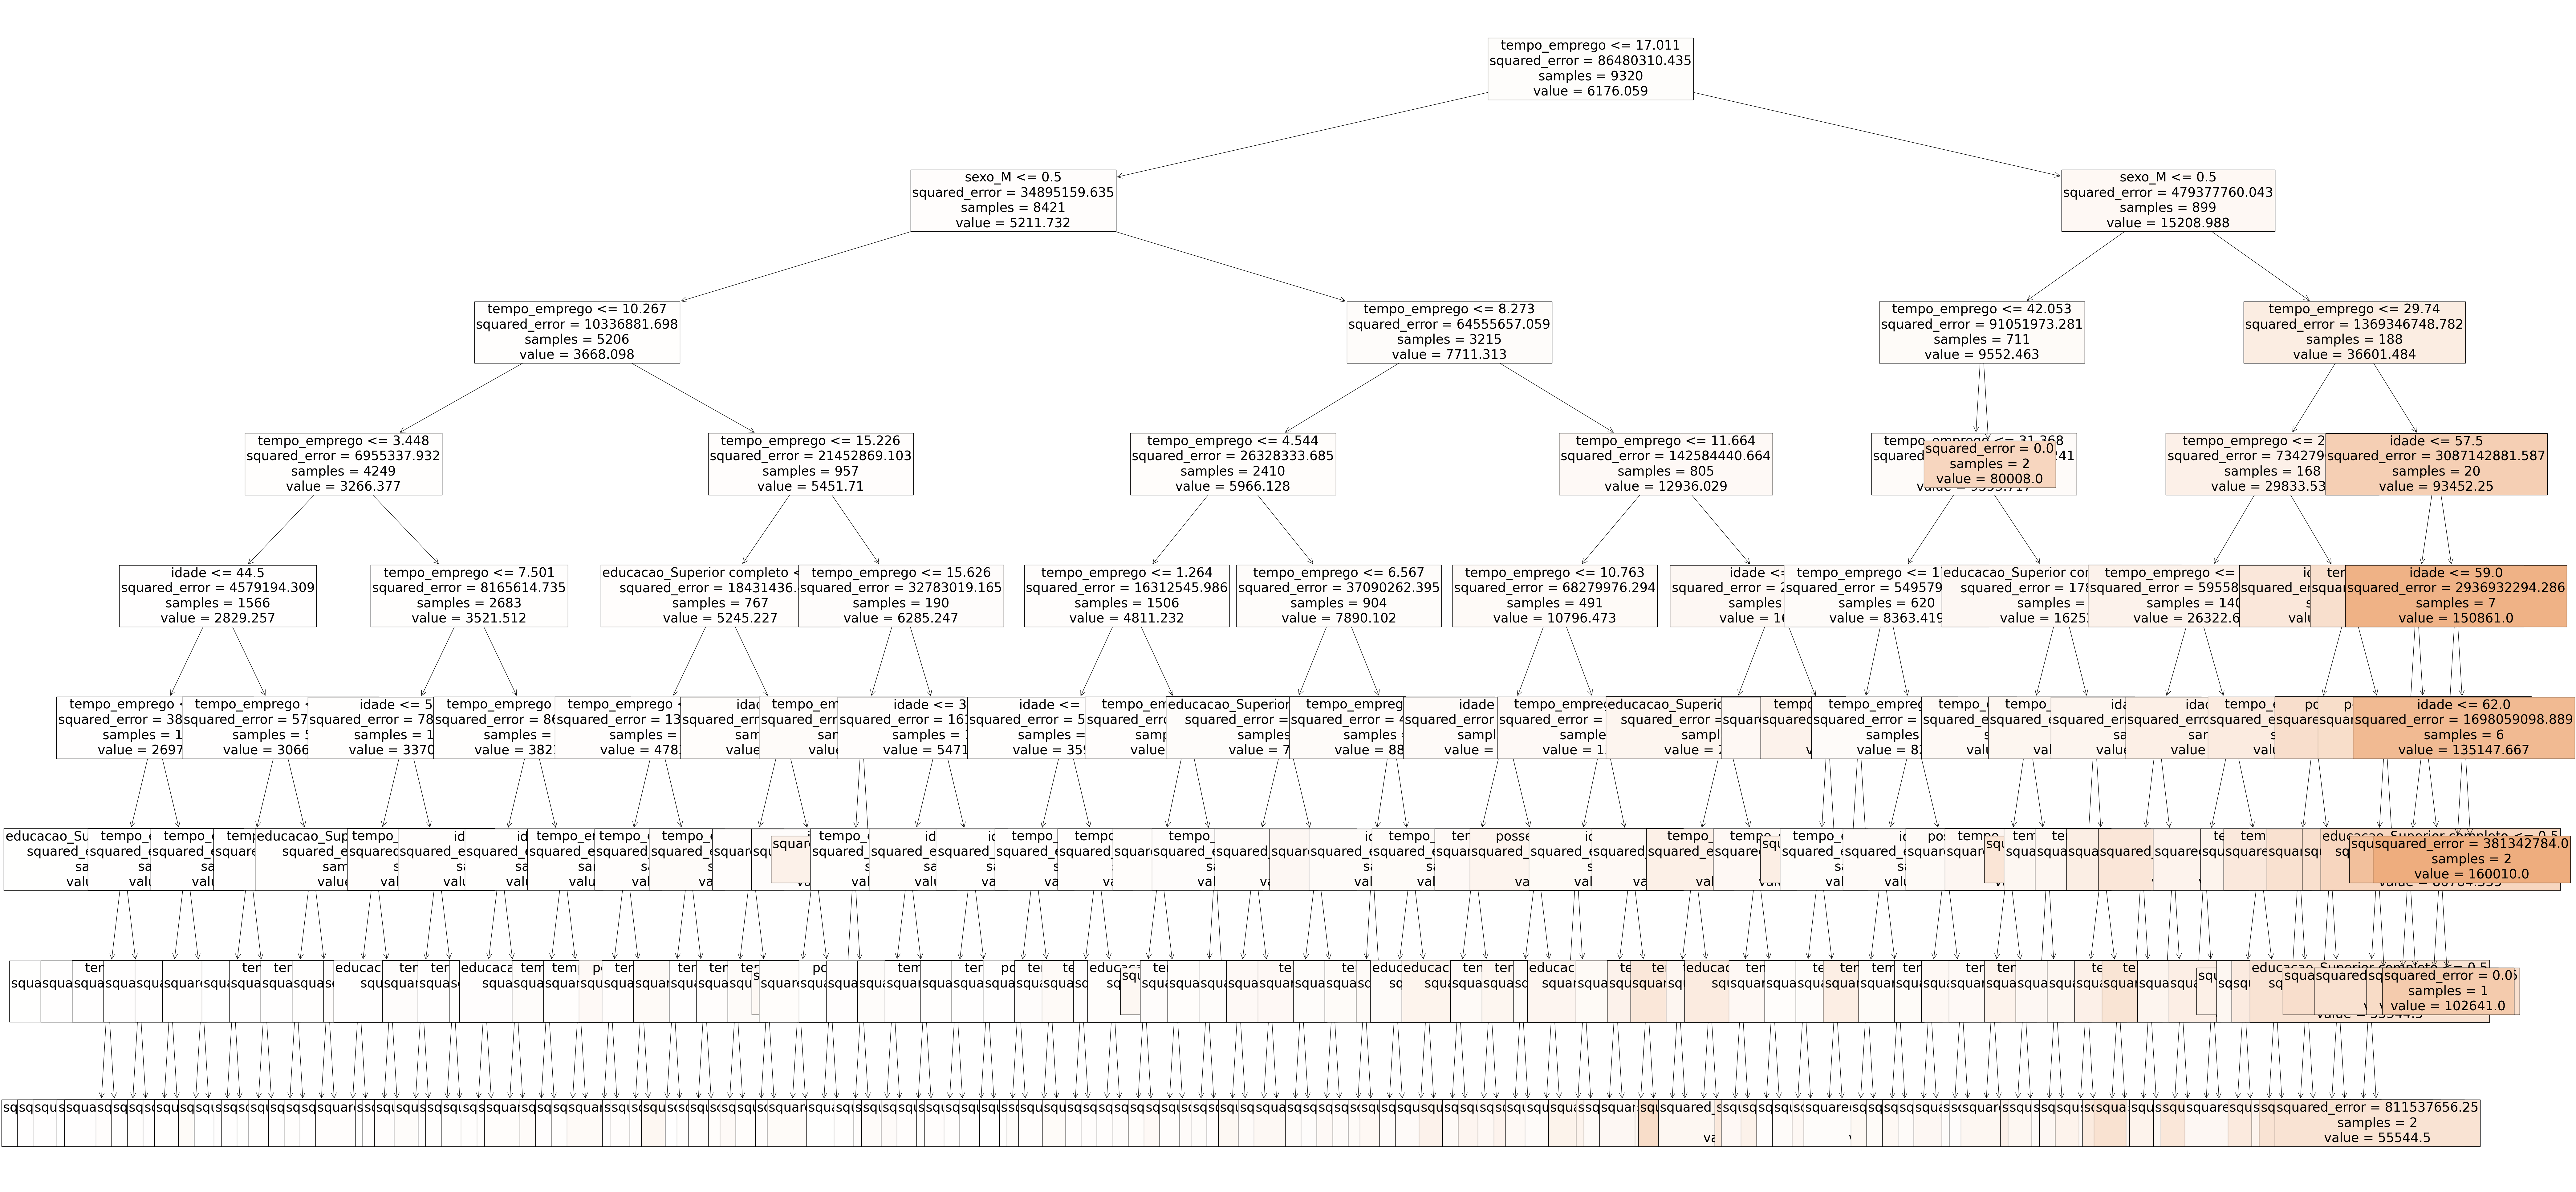

In [27]:
#Visualizando a arvore 

plt.rc('figure', figsize=(100, 50))
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,
                    fontsize=30,
                    filled=True) 

## Etapa 5 Crisp-DM: Avaliação dos resultados


Usando as variaveis reposta obtidas pela tecnica do stepwise selection, temos um summary bastante interessante.

In [28]:
modelo_aval = sm.OLS(y,X).fit()
modelo_aval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              2398.
Date:                Mon, 24 Jun 2024   Prob (F-statistic):                        0.00
Time:                        14:53:16   Log-Likelihood:                     -1.2884e+05
No. Observations:               12427   AIC:                                  2.577e+05
Df Residuals:                   12422   BIC:                                  2.577e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
tempo_emprego                551.1975     10.913     50.510      0.000     529.807     572.588
sexo_M                      5779.7207    150.530     38.396      0.000    5484.658    6074.783
educacao_Superior completo   461.8793    139.511      3.311      0.001     188.416     735.343
idade                         -7.2860      3.300     -2.208      0.027     -13.755      -0.817
posse_de_veiculo             -55.1890    147.099     -0.375      0.708    -343.525     233.147
==============================================================================
Omnibus:                    17656.366   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10003977.251
Skew:                           8.206   Prob(JB):                         0.00
Kurtosis:                     141.026   Cond. No.                         108.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alguns das variaveis observadas inicialmente se mostraram realmente significantes quando olhamos para a renda. As variaveis que mais se destacaram foram o sexo, tempo_emprego, idade, pessoas com ensino superior completo e posse de veiculo. Das informaçoes que podemos afirmar que influenciam o individuo a ter uma renda superior é: 'Ser do sexo masculino, tem um tempo maior no emprego, consequentemente ter mais idade, possuir veiculo e ter pelo menos ensino superior completo.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

A implantação do codigo foi realizada atraves do Streamlit. Em seguida deixarei o link do meu perfil no **Github** com o arquivo .readme com uma pequena demonstração das análises.